In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

# EDA (TEST DATA)

In [2]:
#importing the test dataset
test_data = pd.read_csv("testComment.csv",sep='\t')
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153181,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153182,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153183,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153184,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [3]:
test_data.columns  # checking columns of test dataset

Index(['id', 'comment_text'], dtype='object')

In [4]:
test_data.shape  # checking the rows and cols count

(153186, 2)

In [5]:
test_data.dtypes   # checking the datatypes of cols

id              object
comment_text    object
dtype: object

In [6]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153186 entries, 0 to 153185
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153186 non-null  object
 1   comment_text  153157 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [7]:
test_data.isnull() # checking for any null values

,id,comment_text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
153181,False,False
153182,False,False
153183,False,False
153184,False,False


In [8]:
test_data.isnull().sum() # null  values column wise counts

id               0
comment_text    29
dtype: int64

<AxesSubplot:>

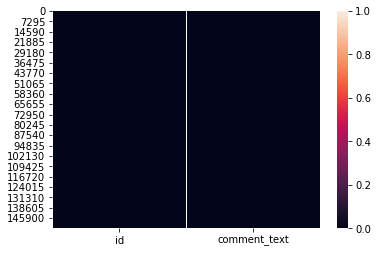

In [9]:
sns.heatmap(test_data.isnull())

In [10]:
# dropping rows having null values
test_data=test_data.dropna()
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153181,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153182,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153183,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153184,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


## Data Preprocessing

In [11]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
stop_words=set(stopwords.words('english'))
lemma=WordNetLemmatizer()

In [13]:
# function to do all preprocessing on comments
def clean_comment(comments_text):
    comments_text=re.sub(r'http\$+','',comments_text) # removing the url
    comments_text=re.sub('[^a-zA-Z]',' ',comments_text) #removing Numbers and punctuation
    comments_text=str(comments_text).lower().replace('\\','').replace('_',' ') #converting all to lower case
    comments_text=word_tokenize(comments_text) #tokenization
    comments_text=[item for item in comments_text if item not in stop_words] # removing stop words
    comments_text=[lemma.lemmatize(word=w,pos='v') for w in comments_text] #lemmatization
    comments_text=[i for i in comments_text if len(i)>=2] # removing the words having length <2
    return comments_text

In [14]:
test_data['comment_text']=test_data["comment_text"].apply(lambda x:clean_comment(x)) # preprocessing the comments for further data modelling 

In [15]:
test_data['comment_text']=[" ".join(comments_text) for comments_text in test_data['comment_text'].values] # converting list to string
test_data # cleaned text

,id,comment_text
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hat sad ...
1,0000247867823ef7,rfc title fine imo
2,00013b17ad220c46,source zawe ashton lapland
3,00017563c3f7919a,look back source information update correct fo...
4,00017695ad8997eb,anonymously edit article
...,...,...
153181,fffcd0960ee309b5,totally agree stuff nothing long crap
153182,fffd7a9a6eb32c16,throw field home plate get faster throw cut ma...
153183,fffda9e8d6fafa9e,okinotorishima categories see change agree cor...
153184,fffe8f1340a79fc2,one found nations eu germany law return quite ...


In [16]:
test_data["comment_text"][0] 

'yo bitch ja rule succesful ever whats hat sad mofuckas bitch slap ur pethedic white face get kiss ass guy sicken ja rule pride da music man dont diss shit nothin wrong bein like tupac brother fuckin white boys get things right next time'

# Data Visualization


In [17]:
from wordcloud import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords

In [18]:
def wordcloud(comment_count):
    
    text=comment_count["comment_text"]
    wc=WordCloud(background_color='black',max_words=4000)
    
    wc.generate(" ".join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(wc.recolor(colormap='gist_earth',random_state=244),alpha=0.98)

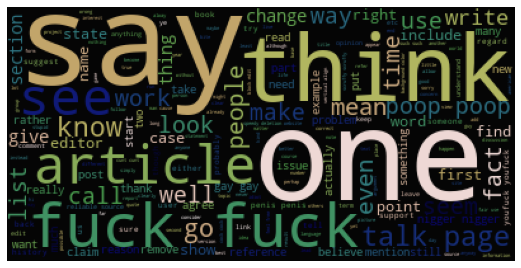

In [19]:
wordcloud(test_data) # displaying the use of few words through Word Cloud

## Above wordcloud shows the words  used in test data. 

# EDA on train data

In [20]:
train_data = pd.read_csv("traincomment.csv",sep='\t')
train_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159616,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159617,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159618,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159619,fff125370e4aaaf3,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
train_data.columns # checking columns of train dataset


Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

# EDA

In [22]:
train_data.shape  # checking the rows and cols count

(159621, 8)

In [23]:
train_data.columns  # checking the various cols

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [24]:
train_data.dtypes   # checking the datatypes of cols

id                   object
comment_text         object
malignant           float64
highly_malignant    float64
rude                float64
threat              float64
abuse               float64
loathe              float64
dtype: object

In [25]:
train_data.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159528.000000,159528.000000,159528.000000,159528.000000,159528.000000,159509.000000
mean,0.095839,0.010005,0.052931,0.002996,0.049364,0.008808
std,0.294371,0.099521,0.223897,0.054657,0.216628,0.093438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Key Observations here

#### Count is not same for all values . seems there are some null values

In [26]:
# checking the information about the not-null, datatypes, rows and cols count of the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159621 entries, 0 to 159620
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                159621 non-null  object 
 1   comment_text      159547 non-null  object 
 2   malignant         159528 non-null  float64
 3   highly_malignant  159528 non-null  float64
 4   rude              159528 non-null  float64
 5   threat            159528 non-null  float64
 6   abuse             159528 non-null  float64
 7   loathe            159509 non-null  float64
dtypes: float64(6), object(2)
memory usage: 9.7+ MB


In [27]:
train_data.isnull() # checking for any null values

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
159616,False,False,False,False,False,False,False,False
159617,False,False,False,False,False,False,False,False
159618,False,False,False,False,False,False,False,False
159619,False,False,False,False,False,False,False,False


In [28]:
train_data.isnull().sum() # null  values column wise counts

id                    0
comment_text         74
malignant            93
highly_malignant     93
rude                 93
threat               93
abuse                93
loathe              112
dtype: int64

<AxesSubplot:>

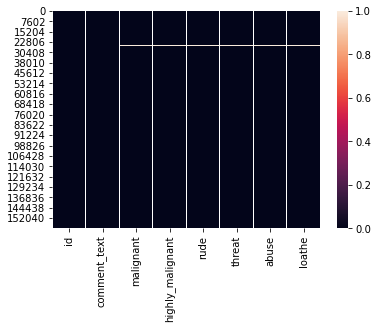

In [29]:
sns.heatmap(train_data.isnull())

In [30]:
# dropping rows having null values
train_data=train_data.dropna(axis=0)
train_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159616,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0.0,0.0,0.0,0.0,0.0,0.0
159617,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0.0,0.0,0.0,0.0,0.0,0.0
159618,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0.0,0.0,0.0,0.0,0.0,0.0
159619,fff125370e4aaaf3,And it looks like it was actually you who put ...,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
train_data.nunique()

id                  159509
comment_text        159509
malignant                2
highly_malignant         2
rude                     2
threat                   2
abuse                    2
loathe                   2
dtype: int64

In [32]:
comment_count=train_data.iloc[:,2:].sum()
comment_count

malignant           15289.0
highly_malignant     1594.0
rude                 8444.0
threat                478.0
abuse                7875.0
loathe               1405.0
dtype: float64

# Data Preprocessing 

In [33]:
train_data['comment_text']=train_data["comment_text"].apply(lambda x:clean_comment(x)) # preprocessing the comments for further data modelling 

In [34]:
train_data['comment_text']=[" ".join(comments_text) for comments_text in train_data['comment_text'].values] # converting list to string
train_data

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,explanation edit make username hardcore metall...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,aww match background colour seemingly stick th...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,hey man really try edit war guy constantly rem...,0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,make real suggestions improvement wonder secti...,0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,sir hero chance remember page,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
159616,ffe987279560d7ff,second time ask view completely contradict cov...,0.0,0.0,0.0,0.0,0.0,0.0
159617,ffea4adeee384e90,ashamed horrible thing put talk page,0.0,0.0,0.0,0.0,0.0,0.0
159618,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0.0,0.0,0.0,0.0,0.0,0.0
159619,fff125370e4aaaf3,look like actually put speedy first version de...,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
train_data["comment_text"][0]

'explanation edit make username hardcore metallica fan revert vandalisms closure gas vote new york dolls fac please remove template talk page since retire'

## Dividing our dataset into six parts. i.e comment with each class

In [36]:
malig_data=train_data.loc[:,['id','comment_text','malignant']]
malig_data

,id,comment_text,malignant
0,0000997932d777bf,explanation edit make username hardcore metall...,0.0
1,000103f0d9cfb60f,aww match background colour seemingly stick th...,0.0
2,000113f07ec002fd,hey man really try edit war guy constantly rem...,0.0
3,0001b41b1c6bb37e,make real suggestions improvement wonder secti...,0.0
4,0001d958c54c6e35,sir hero chance remember page,0.0
...,...,...,...
159616,ffe987279560d7ff,second time ask view completely contradict cov...,0.0
159617,ffea4adeee384e90,ashamed horrible thing put talk page,0.0
159618,ffee36eab5c267c9,spitzer umm theres actual article prostitution...,0.0
159619,fff125370e4aaaf3,look like actually put speedy first version de...,0.0


In [37]:
highmalig_data=train_data.loc[:,['id','comment_text','highly_malignant']]

In [38]:
#rude, abuse, highly_malignant,loathe,threat
rude_data=train_data.loc[:,['id','comment_text','rude']]

In [39]:
abuse_data=train_data.loc[:,['id','comment_text','abuse']]

In [40]:
loathe_data=train_data.loc[:,['id','comment_text','loathe']]

In [41]:
threat_data=train_data.loc[:,['id','comment_text','threat']]

# Data Visualization

Univariate Analysis


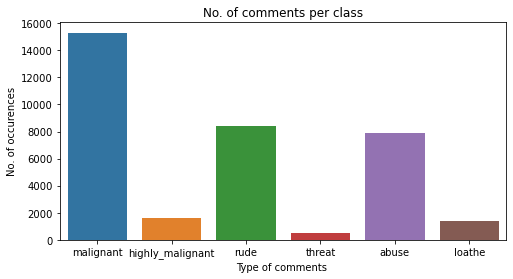

In [42]:
# plotting no. of comments per class
plt.figure(figsize=(8,4))
ax=sns.barplot(comment_count.index,comment_count.values)

plt.title("No. of comments per class")
plt.ylabel("No. of occurences")
plt.xlabel("Type of comments ")

plt.show()

### Above barplot shows the max comments are concentrated in malignant class followed by rude, abuse, highly_malignant,loathe,threat

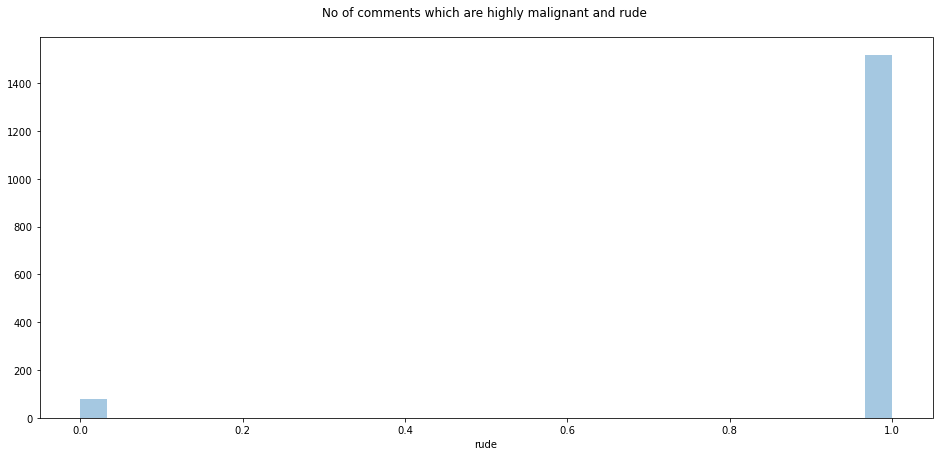

In [43]:
plt.figure(figsize=(16,7))
sns.distplot(train_data[train_data['highly_malignant']==1]['rude'],kde=False,bins=30)
plt.title('No of comments which are highly malignant and rude \n')
plt.show()

### Above distplot shows very less comments are having both class i.e highly malignant and rude too

Text(0.5, 0, '# of categories')

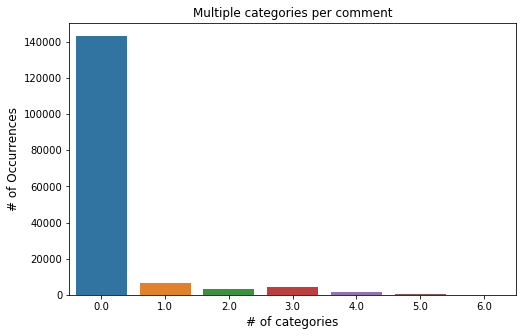

In [44]:
rowsums = train_data.iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

In [45]:
from wordcloud import wordcloud
from PIL import Image
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [46]:
def wordcloud(comment_count,label):
    # finding classes with malignant comments only 
    subset=comment_count[comment_count[label]==1]
    text=subset.comment_text.values
    wc=WordCloud(background_color='black',max_words=4000)
    
    wc.generate(" ".join(text))
    
    plt.figure(figsize=(20,20))
    plt.subplot(221)
    plt.axis("off")
    plt.imshow(wc.recolor(colormap='gist_earth',random_state=244),alpha=0.98)

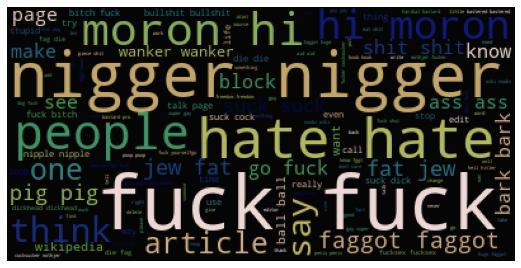

In [47]:
wordcloud(malig_data,"malignant")

###  Above wordcloud shows the words frequently used in malignant class. 
Can see any of the class by changing the class name

## Steps to be followed in loop for all the classes 

#### 1. (TDidF Vectorizer) Encoding text into vectors for further model training
#### 2. Pipeline the models with TDidF Vectorizer and OneVsrestClassifier for solving multiclass classification model
#### 3. Model Training and metrics representation

In [49]:
#importing the model training libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline

In [50]:
from sklearn.metrics import f1_score,confusion_matrix,precision_score,recall_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [51]:
# copying all the classes to use them in iterations
classes=["malignant","highly_malignant","rude","abuse","threat","loathe"]


In [52]:
train, test = train_test_split(train_data, random_state=42, test_size=0.33, shuffle=True)
X_train = train.comment_text
X_test = test.comment_text
print(X_train.shape)
print(X_test.shape)

(106871,)
(52638,)


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
# making 3 datasets to display f1_score,precion score ,recall score
f1_score_data=pd.DataFrame(index=["Log Regression","BernoulliNB","MultinomialNB","LinearSVC"])
precision_data=pd.DataFrame(index=["Log Regression","BernoulliNB","MultinomialNB","LinearSVC"])
recall_data=pd.DataFrame(index=["Log Regression","BernoulliNB","MultinomialNB","LinearSVC"])

model=[LogisticRegression(),BernoulliNB(),MultinomialNB(),LinearSVC()]


for i in classes:       
        #making lists to store f1_score,precision ,recall for all 4 models
    f1_score_list=[]
    precision_list=[]
    recall_list=[]
    for m in model:
        #pipelining the model with OneVsRestClassifier for multiclass classification
        NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(smooth_idf=False,max_features=20000,ngram_range=(1,1),analyzer='word')),
                ('clf', OneVsRestClassifier(m)),])

        print('MultinomialNB model performance for',i,'with \n' )
    # train the model 
        NB_pipeline.fit(X_train,train[i])
    # compute the testing accuracy
        y_pred=NB_pipeline.predict(X_test)
    #appending metrics in respective lists
        f1_score_list.append(f1_score(test[i],y_pred,average='micro'))
        precision_list.append(precision_score(test[i],y_pred,average='micro'))
        recall_list.append(recall_score(test[i],y_pred,average='micro'))
        
        f1_scores_data=f1_score_list
        precisions_data=precision_list
        recalls_data=recall_list
     
        print("classification report for",i," comments of model" , m, "is \n",classification_report(test[i],y_pred))
        print("**********************************************************************\n")
        
    # copying all 4 models and their metrics for 6 class in datasets
    f1_score_data[i]=f1_scores_data
    precision_data[i]=precisions_data
    recall_data[i]=recalls_data
   


    



MultinomialNB model performance for malignant with 

classification report for malignant  comments of model LogisticRegression() is 
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     47643
         1.0       0.91      0.61      0.73      4995

    accuracy                           0.96     52638
   macro avg       0.94      0.80      0.85     52638
weighted avg       0.96      0.96      0.95     52638

**********************************************************************

MultinomialNB model performance for malignant with 

classification report for malignant  comments of model BernoulliNB() is 
               precision    recall  f1-score   support

         0.0       0.98      0.69      0.81     47643
         1.0       0.23      0.88      0.36      4995

    accuracy                           0.70     52638
   macro avg       0.60      0.78      0.58     52638
weighted avg       0.91      0.70      0.77     52638

*************

In [71]:
f1_score_data

,malignant,highly_malignant,rude,abuse,threat,loathe
Log Regression,0.957141,0.990349,0.978115,0.969813,0.997207,0.992268
BernoulliNB,0.704358,0.986474,0.760401,0.773092,0.991622,0.987082
MultinomialNB,0.945097,0.990064,0.967628,0.963619,0.997017,0.991527
LinearSVC,0.959630,0.990311,0.979938,0.971124,0.997207,0.992363


In [72]:
precision_data

,malignant,highly_malignant,rude,abuse,threat,loathe
Log Regression,0.957141,0.990349,0.978115,0.969813,0.997207,0.992268
BernoulliNB,0.704358,0.986474,0.760401,0.773092,0.991622,0.987082
MultinomialNB,0.945097,0.990064,0.967628,0.963619,0.997017,0.991527
LinearSVC,0.959630,0.990311,0.979938,0.971124,0.997207,0.992363


In [73]:
recall_data

,malignant,highly_malignant,rude,abuse,threat,loathe
Log Regression,0.957141,0.990349,0.978115,0.969813,0.997207,0.992268
BernoulliNB,0.704358,0.986474,0.760401,0.773092,0.991622,0.987082
MultinomialNB,0.945097,0.990064,0.967628,0.963619,0.997017,0.991527
LinearSVC,0.959630,0.990311,0.979938,0.971124,0.997207,0.992363


## LinearSVC is performing best in all the metrics i.e f1_scoe, recall score and precision scoring and for all classes. 

## parameter tuning by cross validating through roc_auc scoring

In [75]:
# cross validating LinearSVC
from sklearn.model_selection import cross_val_score

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(smooth_idf=False,max_features=20000,ngram_range=(1,1),analyzer='word')),
                ('clf', OneVsRestClassifier(LinearSVC())),
            ])
for i  in classes:
    print('LinearSVC model performance for class {}'.format(i))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[i])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    #cross val score using scoring as roc_auc 
    score=cross_val_score(SVC_pipeline,X_test,test[i],cv=4,scoring='roc_auc')
    print("Cross Validation Score for " ,i , "is : " ,score,"\n")
    print("Mean for ",i,"is : " , score.mean())
    print("Standard Deviation for " , i , "is :" , score.std())

LinearSVC model performance for class malignant
Cross Validation Score for  malignant is :  [0.95309252 0.95842329 0.95558761 0.95858517] 

Mean for  malignant is :  0.9564221484968404
Standard Deviation for  malignant is : 0.0022619744803969
LinearSVC model performance for class highly_malignant
Cross Validation Score for  highly_malignant is :  [0.97587355 0.95257214 0.96174915 0.96804065] 

Mean for  highly_malignant is :  0.9645588730081669
Standard Deviation for  highly_malignant is : 0.008539920759212746
LinearSVC model performance for class rude
Cross Validation Score for  rude is :  [0.97326916 0.97753184 0.97208657 0.97142741] 

Mean for  rude is :  0.9735787475479201
Standard Deviation for  rude is : 0.002375797285839223
LinearSVC model performance for class abuse
Cross Validation Score for  abuse is :  [0.96381819 0.96350599 0.95789662 0.95355151] 

Mean for  abuse is :  0.9596930781929489
Standard Deviation for  abuse is : 0.00425737495517391
LinearSVC model performance for

### LinearSVC is performing better with f1_score  98 % . mean is averaged near 98%. Standard deviation is also very less.

# Saving the model- Serialization

In [76]:
# saving the prediction model

import pickle
filename="comments.pkl"
pickle.dump(SVC_pipeline,open(filename,'wb'))

In [77]:
# load the model
fitted_model=pickle.load(open("comments.pkl",'rb'))

In [78]:
fitted_model

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=20000, smooth_idf=False)),
                ('clf', OneVsRestClassifier(estimator=LinearSVC()))])

In [79]:
# predictions over test data (testcomment.csv)

predictions=fitted_model.predict(test_data["comment_text"])

In [80]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
ds_pred=pd.DataFrame(data=predictions,columns=["Label"])
ds_pred

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
153152,0.0
153153,0.0
153154,0.0
153155,0.0
